In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import confusion_matrix
import nltk
from sklearn import preprocessing
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

The CSV file is read here

In [0]:
df = pd.read_csv('Twitter_Data.csv')
cat = df.dropna()
cat = df.drop('category', axis = 1)
y = df['category']
list1 = []
sentence = cat.copy()
sentence.reset_index(inplace = True)
nltk.download('stopwords')
porterstemmer = PorterStemmer()
for x in range(0, len(sentence)):

    tweet1 = str(sentence['clean_text'][x])
    tweet1 = tweet1.lower()
    tweet1 = tweet1.split()
    tweet1 = [porterstemmer.stem(w) for w in tweet1 if not w in stopwords.words('english')]
    tweet1 = ' '.join(tweet1)
    print(tweet1)
    list1.append(tweet1)


Graphical Representation of Sentiment Values

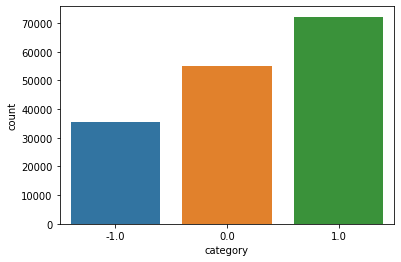

In [24]:
sns.countplot(df.category)
plt.xlabel('category');

Training Phase

In [0]:
oh = [one_hot(w, 5000) for w in list1]
model=Sequential()
model.add(Embedding(5000,40,input_length=30))
model.add(LSTM(100))
model.add(Dense(len(set(df['category'])),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
print(model.summary())
encode_lab = preprocessing.LabelEncoder()
y = encode_lab.fit_transform(y)
Xf = np.array(pad_sequences(oh, padding = 'pre', maxlen = 30))
yf = np.array(y)
yf = to_categorical(yf)
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.3, random_state=42)
model.fit(X_train, y_train,epochs = 10, batch_size = 64)

Testing the Model

In [0]:
test_l, test_accuracy = model.evaluate(X_test, y_test, verbose=10)
print('Test accuracy:', test_accuracy)